# Data loading

In [1]:
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.mixture import GaussianMixture

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
plt.rcParams["figure.dpi"] = 100
sns.set_style("whitegrid")
sns.set_context("notebook")

In [2]:
CWD = Path("/Users/phipag/Git/powertac/ev-simulation-model")

In [3]:
raw_df = pd.read_csv(
    CWD / "data" / "norway_residential" / "Dataset 1_EV charging reports.csv",
    index_col=False,
    sep=";",
    parse_dates=["Start_plugin", "End_plugout"],
    decimal=",",
)
raw_df

,session_ID,Garage_ID,User_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,weekdays_plugin,Plugin_category,Duration_category
0,1,AdO3,AdO3-4,Private,NaN,2018-12-21 10:20:00,10,2018-12-21 10:23:00,10.0,0.30,0.050000,Dec,Friday,late morning (9-12),Less than 3 hours
1,2,AdO3,AdO3-4,Private,NaN,2018-12-21 10:24:00,10,2018-12-21 10:32:00,10.0,0.87,0.136667,Dec,Friday,late morning (9-12),Less than 3 hours
2,3,AdO3,AdO3-4,Private,NaN,2018-12-21 11:33:00,11,2018-12-21 19:46:00,19.0,29.87,8.216389,Dec,Friday,late morning (9-12),Between 6 and 9 hours
3,4,AdO3,AdO3-2,Private,NaN,2018-12-22 16:15:00,16,2018-12-23 16:40:00,16.0,15.56,24.419722,Dec,Saturday,late afternoon (15-18),More than 18 hours
4,5,AdO3,AdO3-2,Private,NaN,2018-12-24 22:03:00,22,2018-12-24 23:02:00,23.0,3.62,0.970556,Dec,Monday,late evening (21-midnight),Less than 3 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,6874,UT15,UT15-2,Private,NaN,2020-01-31 17:57:00,17,2020-01-31 22:29:00,22.0,13.43,4.530000,Jan,Friday,late afternoon (15-18),Between 3 and 6 hours
6874,6875,AsO10,AsO10-1,Private,NaN,2020-01-31 18:32:00,18,2020-01-31 21:43:00,21.0,9.10,3.182222,Jan,Friday,early evening (18-21),Between 3 and 6 hours
6875,6876,Bl2,Bl2-1,Private,NaN,2020-01-31 19:25:00,19,2020-01-31 20:37:00,20.0,4.28,1.203889,Jan,Friday,early evening (18-21),Less than 3 hours
6876,6877,UT7,UT7-1,Private,NaN,2020-01-31 19:27:00,19,2020-01-31 19:48:00,19.0,2.31,0.352500,Jan,Friday,early evening (18-21),Less than 3 hours


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_ID         6878 non-null   int64         
 1   Garage_ID          6878 non-null   object        
 2   User_ID            6878 non-null   object        
 3   User_type          6878 non-null   object        
 4   Shared_ID          1412 non-null   object        
 5   Start_plugin       6878 non-null   datetime64[ns]
 6   Start_plugin_hour  6878 non-null   int64         
 7   End_plugout        6844 non-null   datetime64[ns]
 8   End_plugout_hour   6844 non-null   float64       
 9   El_kWh             6878 non-null   float64       
 10  Duration_hours     6844 non-null   float64       
 11  month_plugin       6878 non-null   object        
 12  weekdays_plugin    6878 non-null   object        
 13  Plugin_category    6878 non-null   object        
 14  Duration

In [5]:
raw_df.describe()

,session_ID,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours
count,6878.000000,6878.000000,6844.000000,6878.000000,6844.000000
mean,3439.500000,16.325240,12.546902,12.720744,11.504440
std,1985.651908,4.363108,5.256756,11.787938,14.148168
min,1.000000,0.000000,0.000000,0.010000,0.003333
25%,1720.250000,15.000000,7.000000,5.200000,2.789028
50%,3439.500000,17.000000,12.000000,9.050000,10.026250
75%,5158.750000,19.000000,17.000000,16.090000,15.221181
max,6878.000000,23.000000,23.000000,80.860000,255.029444


# Raw data exploration

## Automatic with `pandas_profiling`

Uncomment this markdown to re-run the report generation:
```python
profile = ProfileReport(raw_df, explorative=True)
profile.to_file("exploration_report.html")
```

## Manual exploration

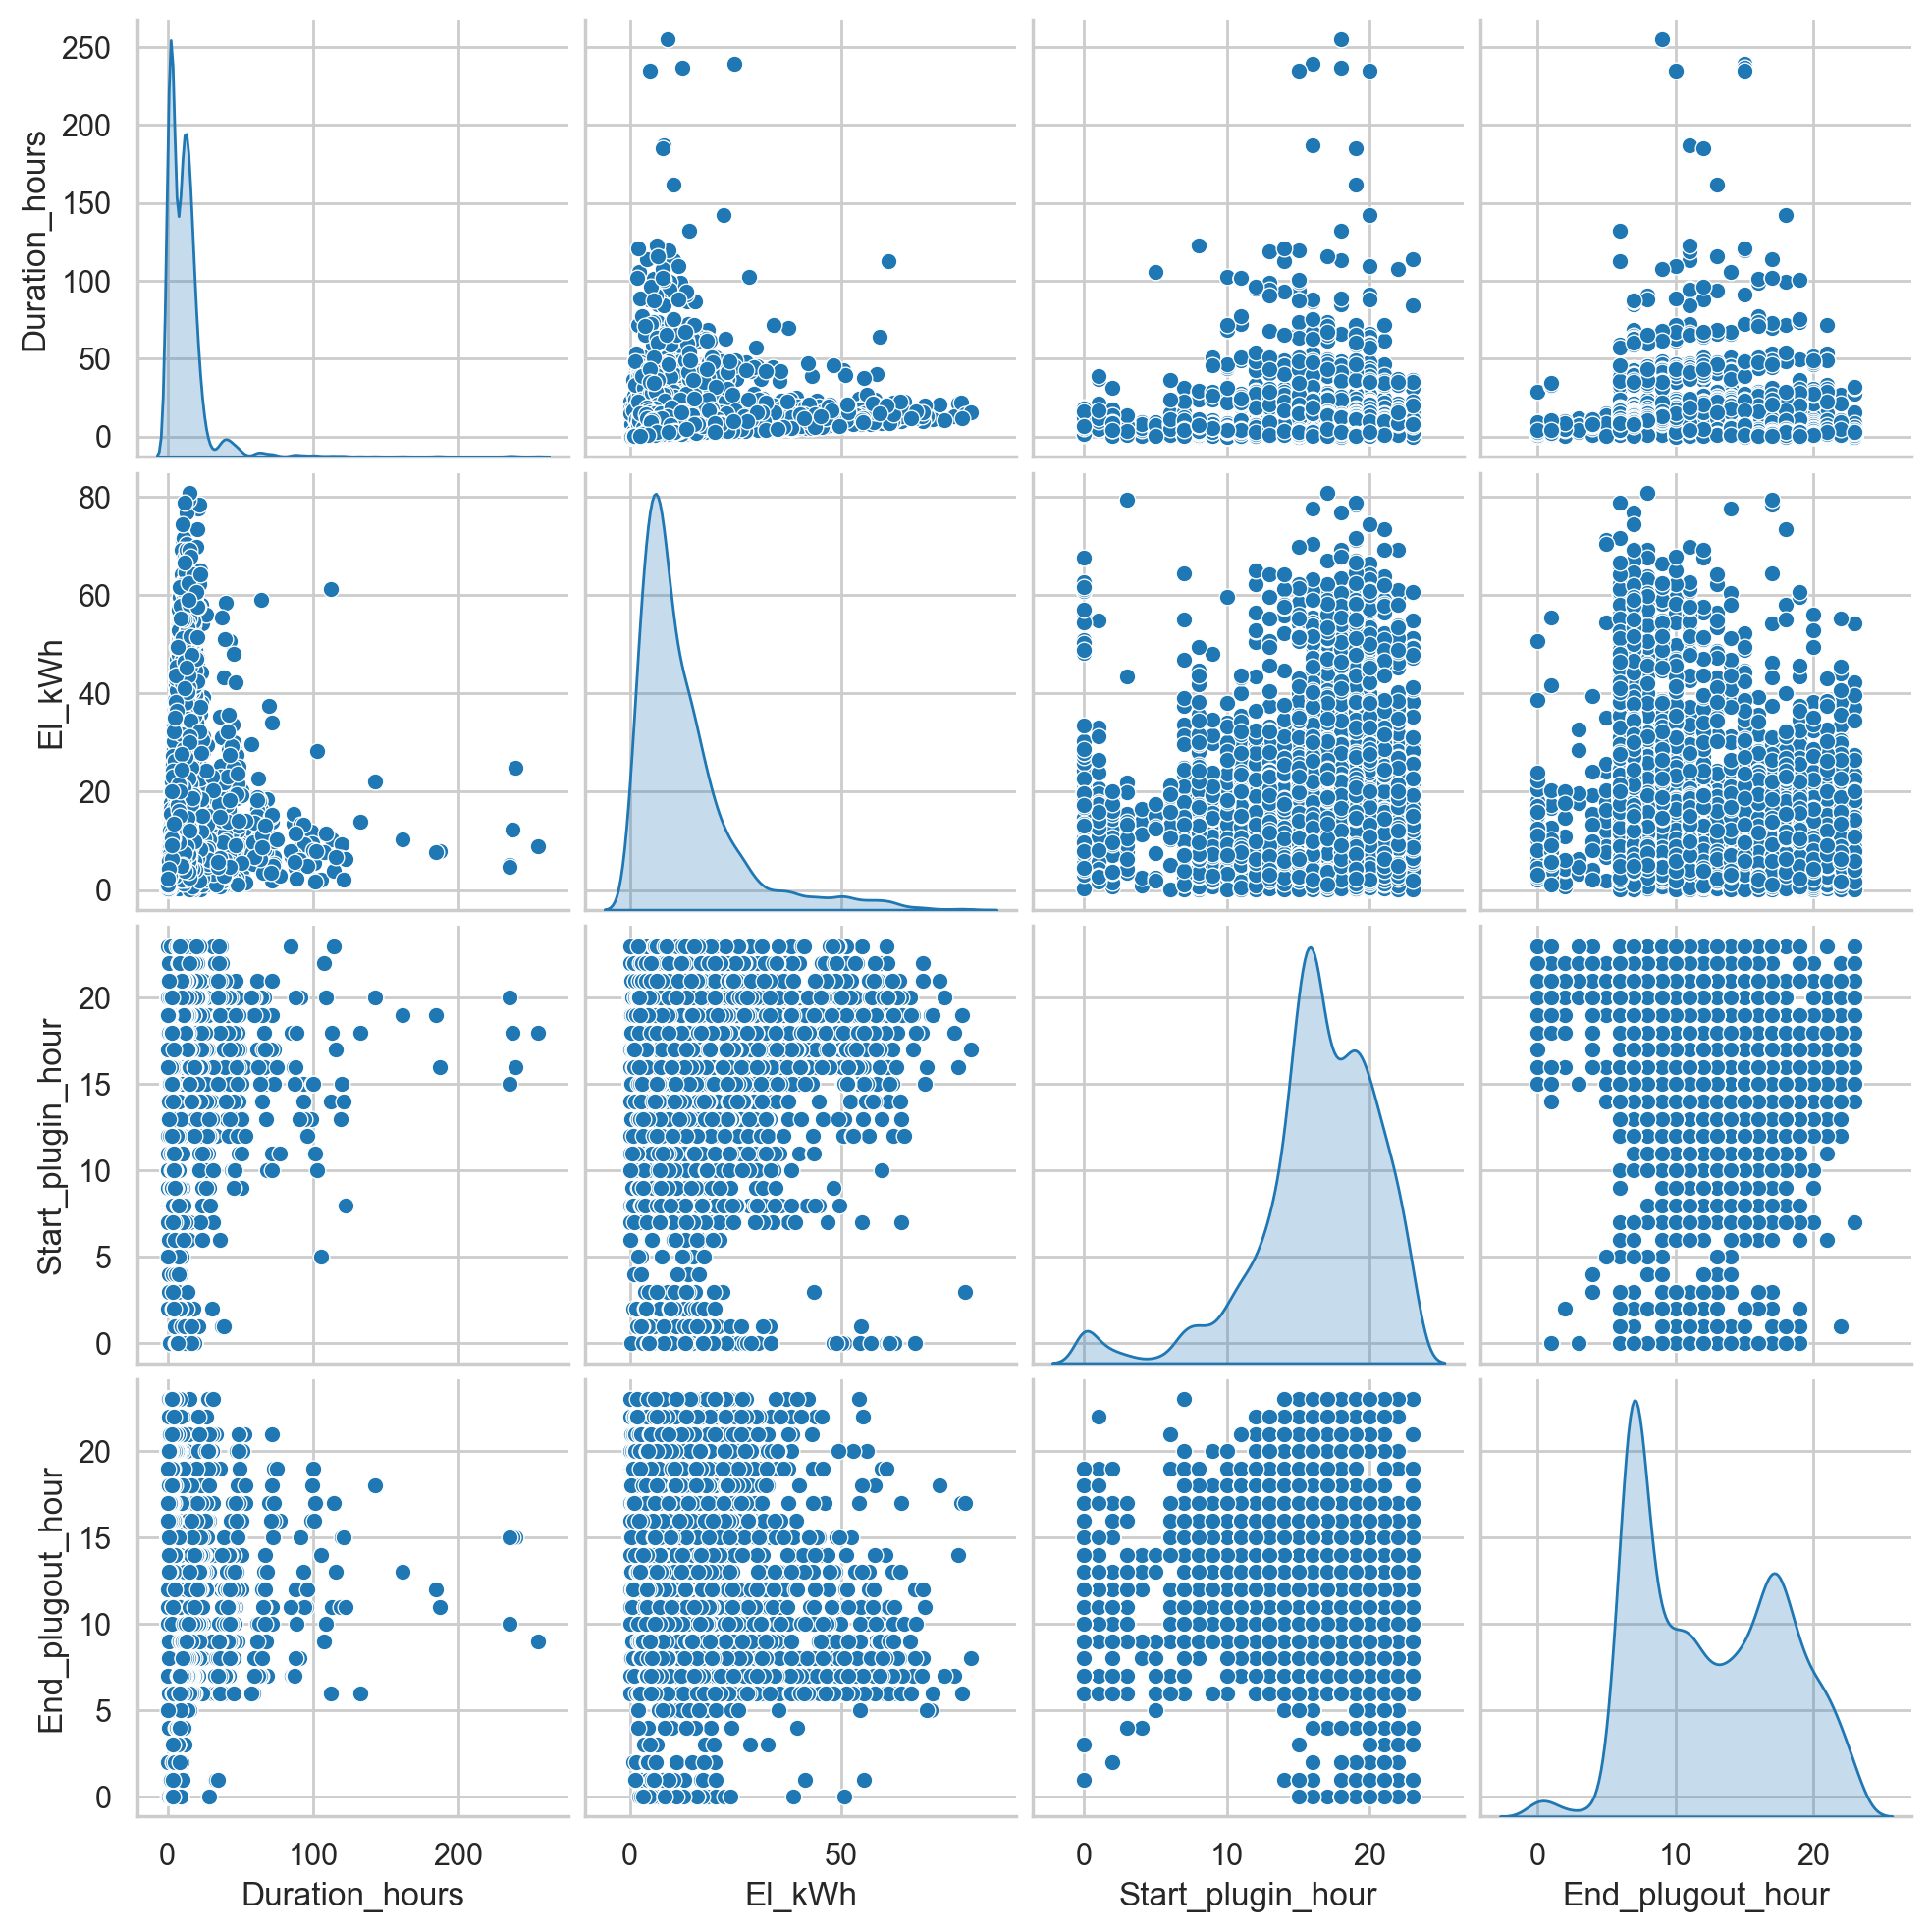

In [6]:
sns.pairplot(
    data=raw_df,
    vars=["Duration_hours", "El_kWh", "Start_plugin_hour", "End_plugout_hour"],
    diag_kind="kde",
);

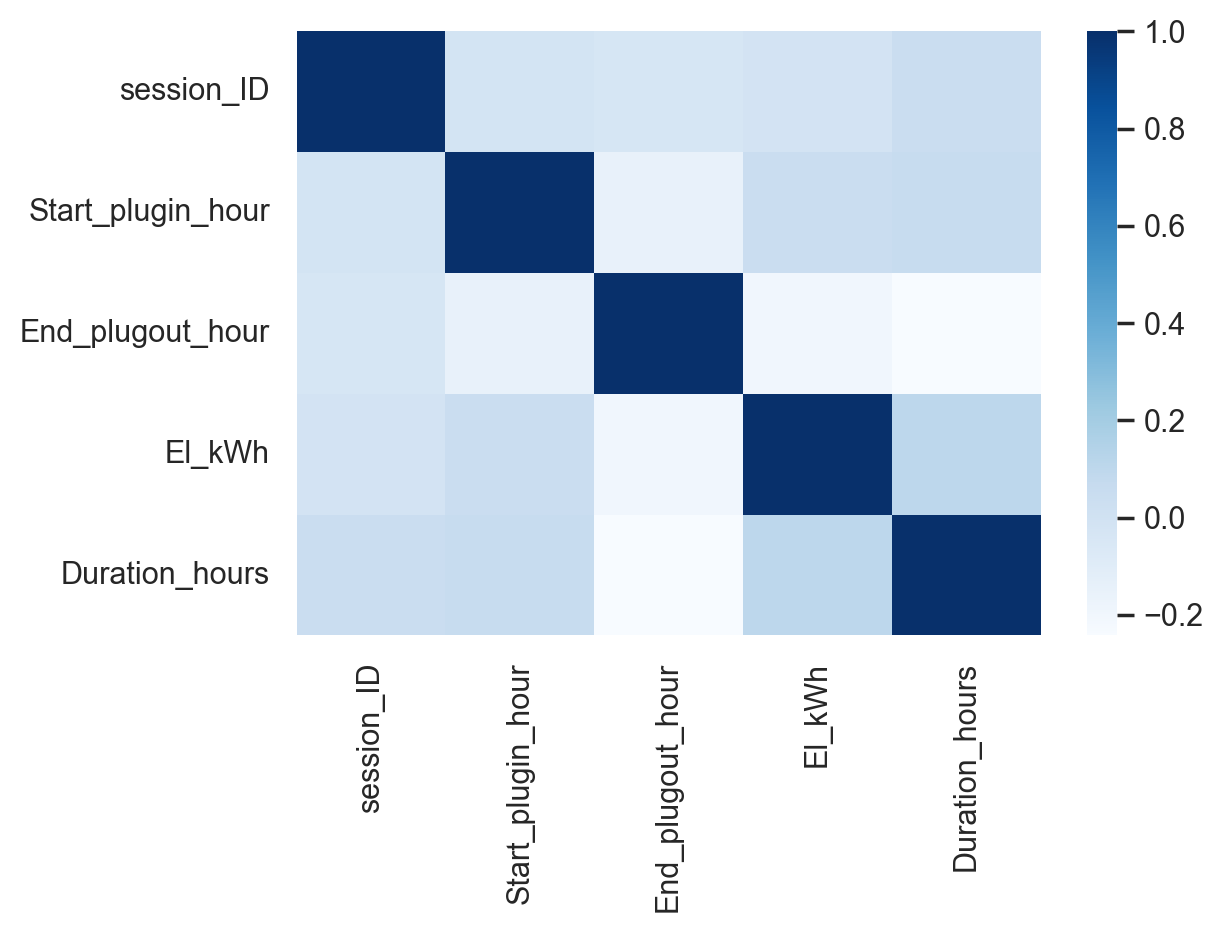

In [7]:
fig, ax = plt.subplots()
sns.heatmap(raw_df.corr(), cmap="Blues", ax=ax);

# Charging pattern exploration

In [8]:
charging_df = raw_df.melt(
    id_vars=["Start_plugin_hour", "End_plugout_hour"],
    value_vars=["Duration_hours", "El_kWh"],
)
charging_df

,Start_plugin_hour,End_plugout_hour,variable,value
0,10,10.0,Duration_hours,0.050000
1,10,10.0,Duration_hours,0.136667
2,11,19.0,Duration_hours,8.216389
3,16,16.0,Duration_hours,24.419722
4,22,23.0,Duration_hours,0.970556
...,...,...,...,...
13751,17,22.0,El_kWh,13.430000
13752,18,21.0,El_kWh,9.100000
13753,19,20.0,El_kWh,4.280000
13754,19,19.0,El_kWh,2.310000


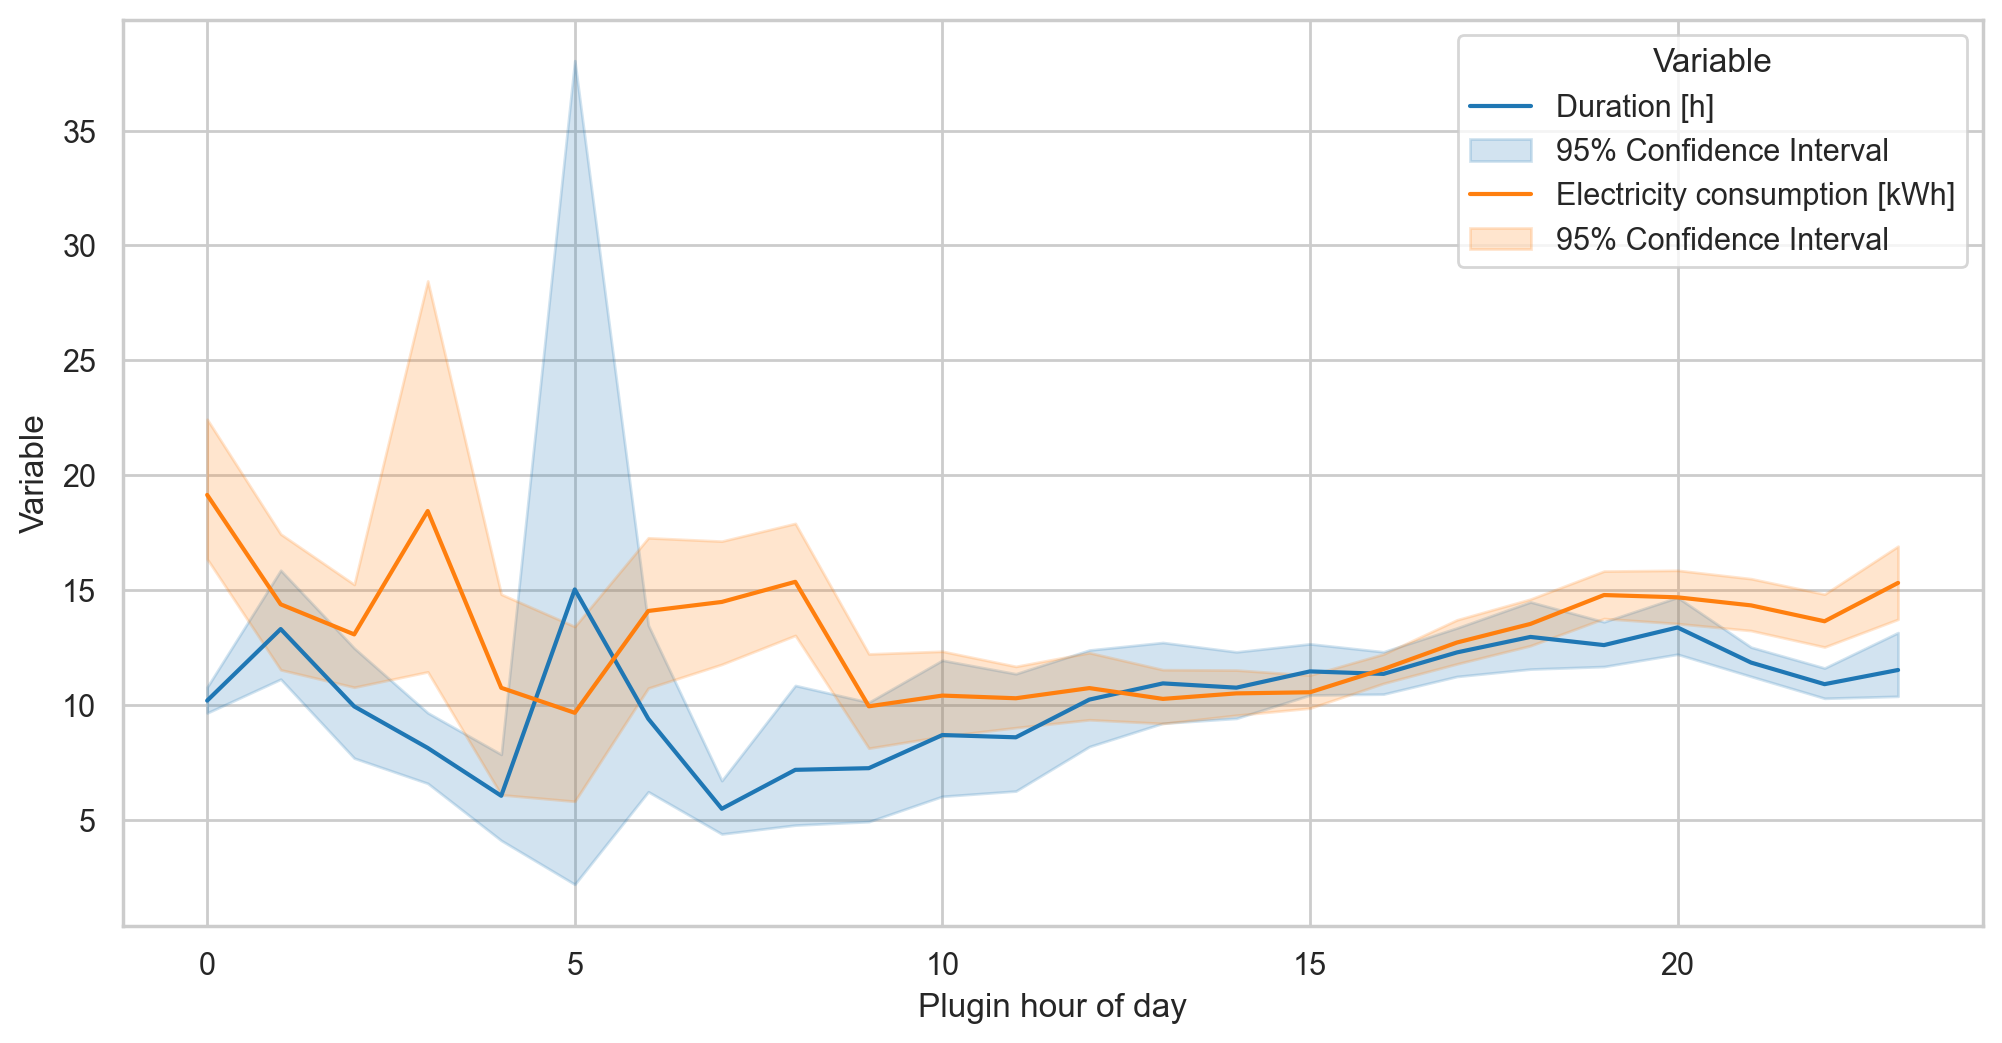

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="Start_plugin_hour", y="value", data=charging_df, hue="variable", ax=ax)
ax.set_xlabel("Plugin hour of day")
ax.set_ylabel("Variable")
ax.legend(
    title="Variable",
    labels=[
        "Duration [h]",
        "95% Confidence Interval",
        "Electricity consumption [kWh]",
        "95% Confidence Interval",
    ],
);

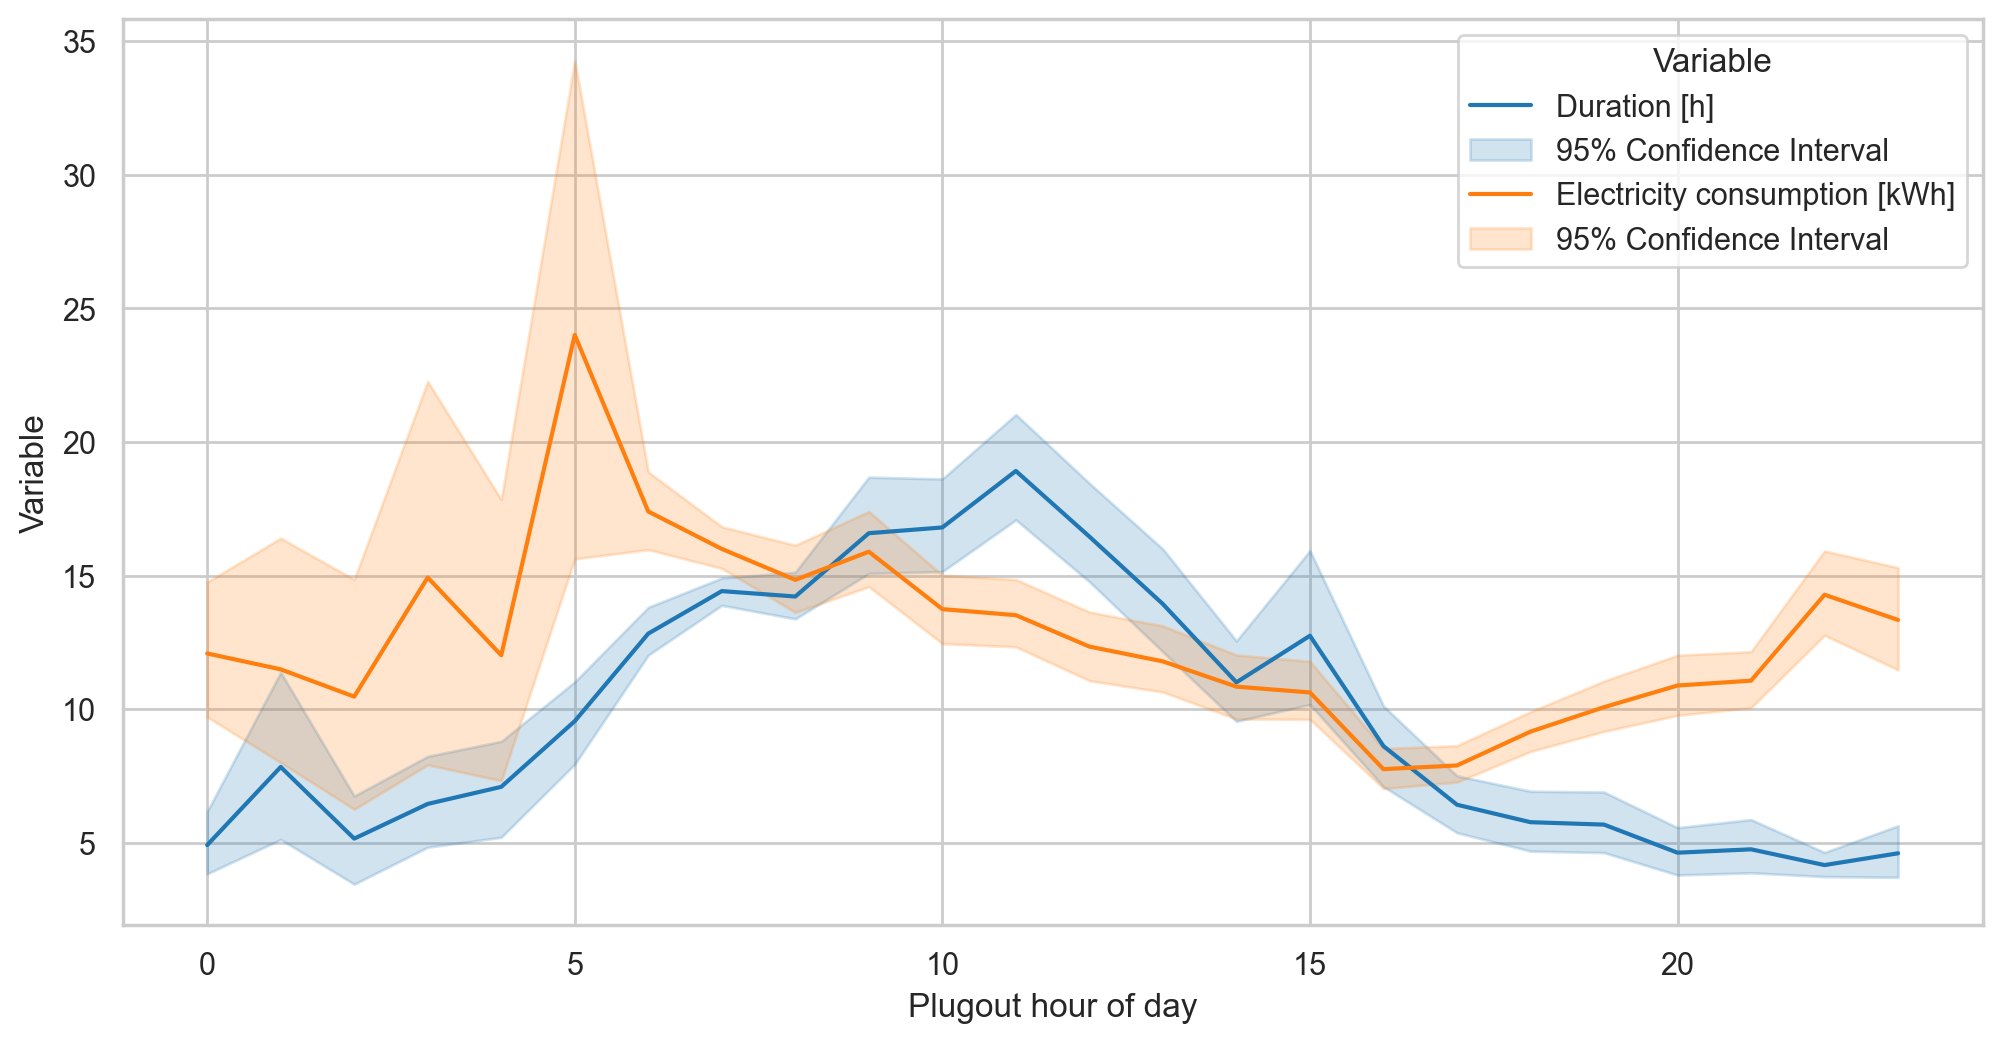

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="End_plugout_hour", y="value", data=charging_df, hue="variable", ax=ax)
ax.set_xlabel("Plugout hour of day")
ax.set_ylabel("Variable")
ax.legend(
    title="Variable",
    labels=[
        "Duration [h]",
        "95% Confidence Interval",
        "Electricity consumption [kWh]",
        "95% Confidence Interval",
    ],
);

# Density estimation

## Exploring the densities

In [11]:
duration_df = raw_df[["Duration_hours", "Start_plugin_hour"]]
duration_df

,Duration_hours,Start_plugin_hour
0,0.050000,10
1,0.136667,10
2,8.216389,11
3,24.419722,16
4,0.970556,22
...,...,...
6873,4.530000,17
6874,3.182222,18
6875,1.203889,19
6876,0.352500,19


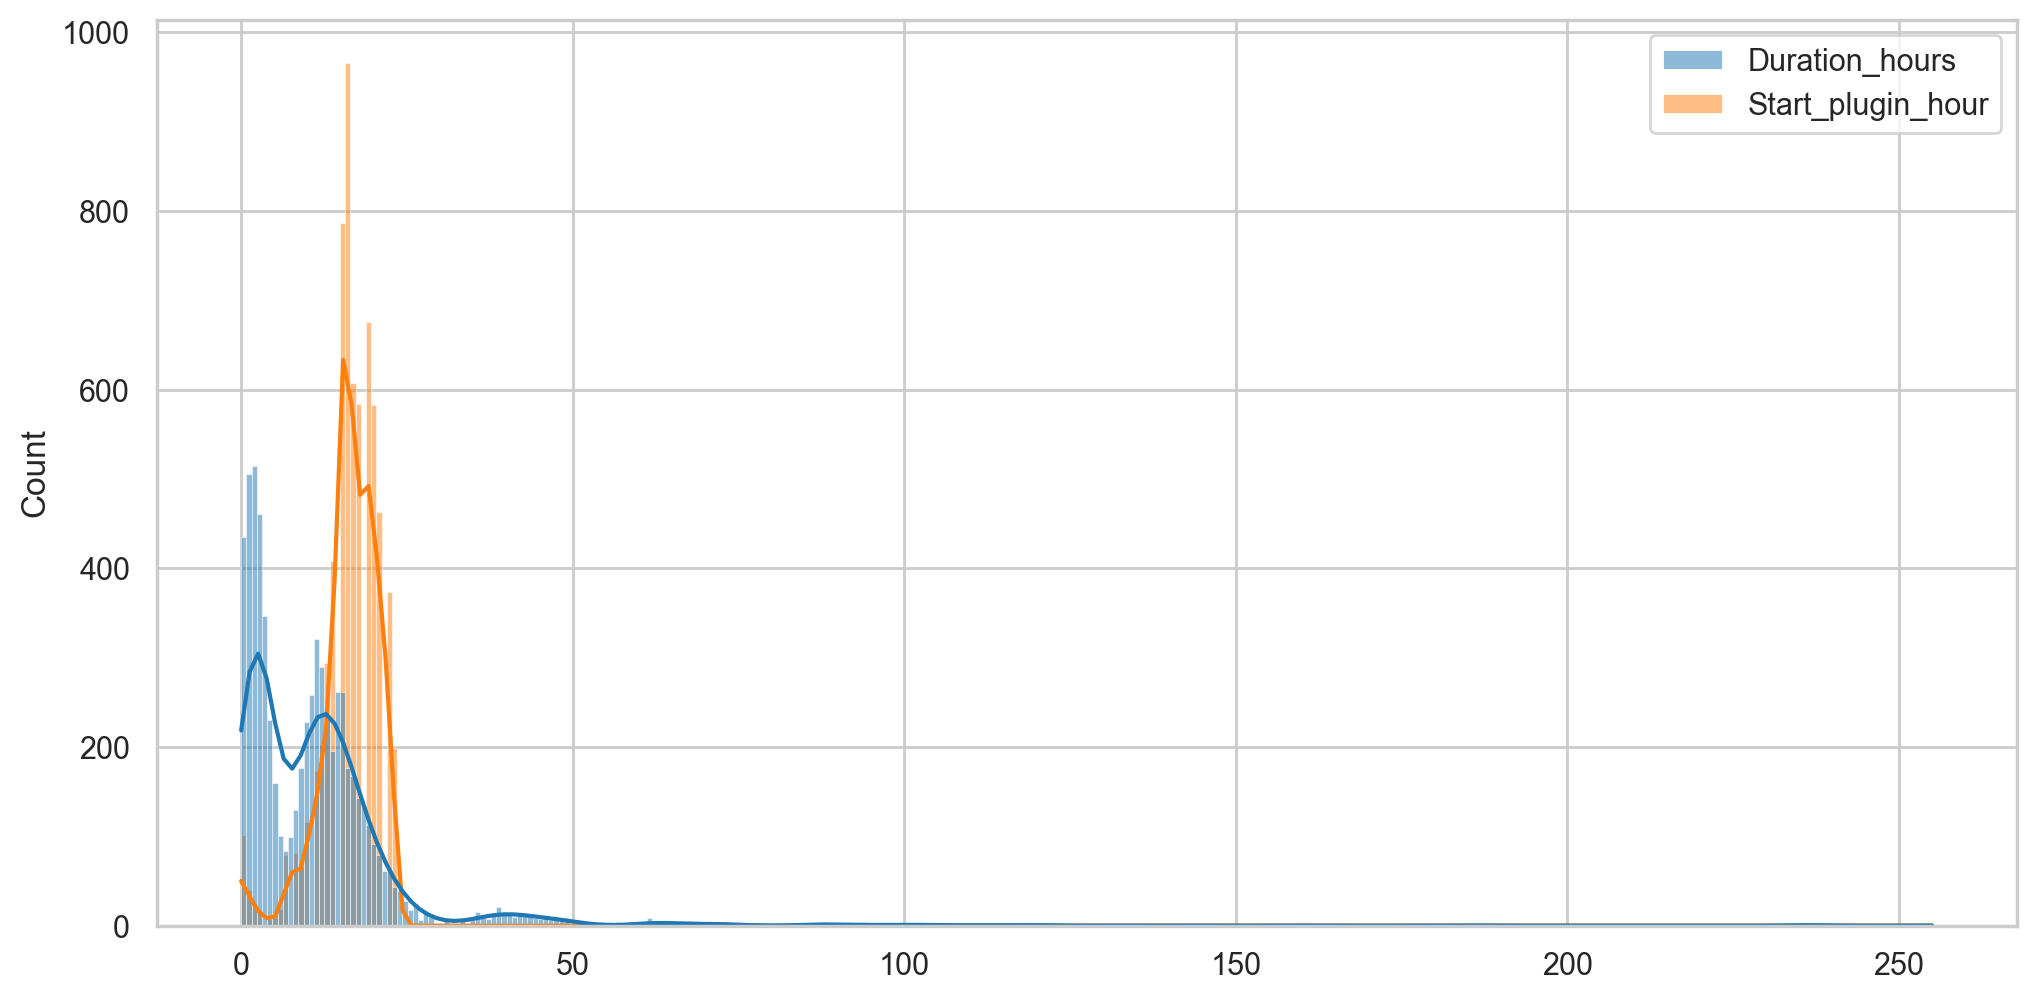

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(duration_df, kde=True, ax=ax);

Let's remove the outliers in `Duration_hours` first by filtering out datapoints with a `zscore < 3`.

In [13]:
duration_df = duration_df[
    (duration_df["Duration_hours"] - duration_df["Duration_hours"].mean()) / duration_df["Duration_hours"].std(ddof=0)
    < 3
].copy()

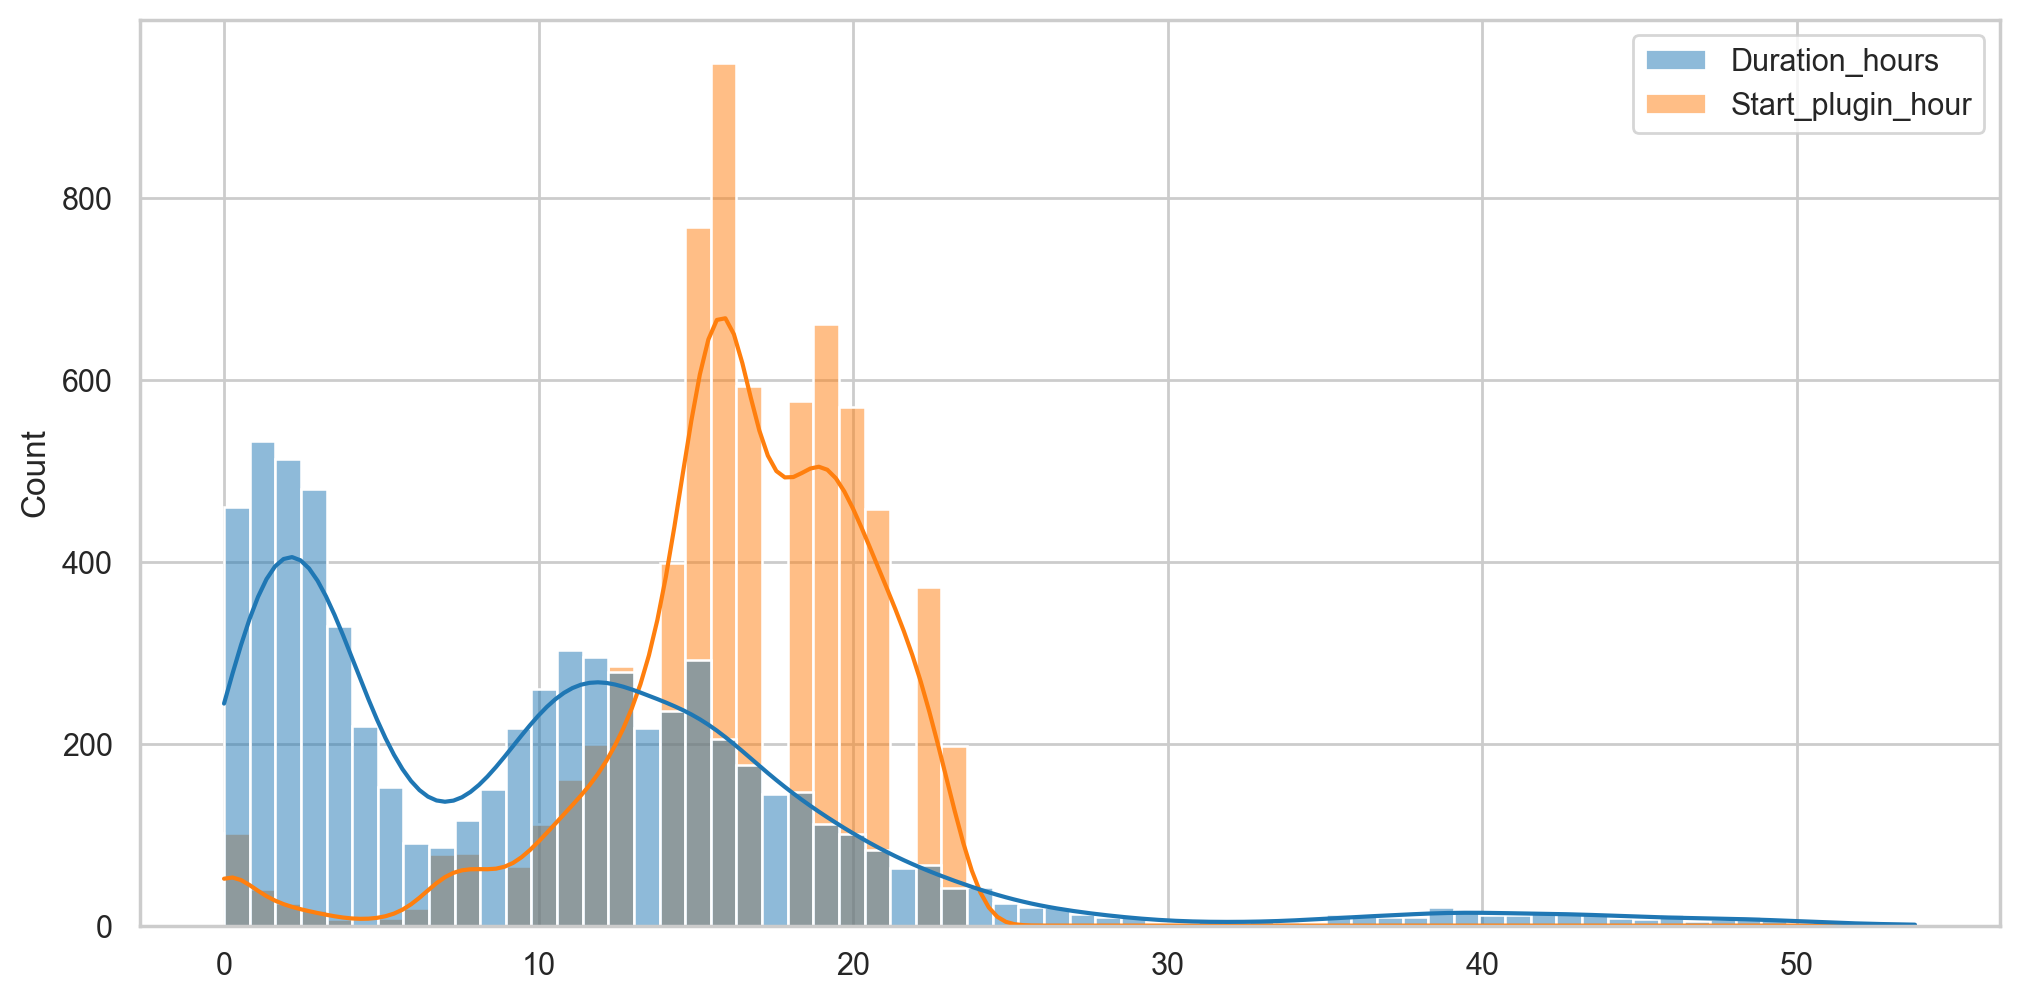

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(duration_df, kde=True, ax=ax);

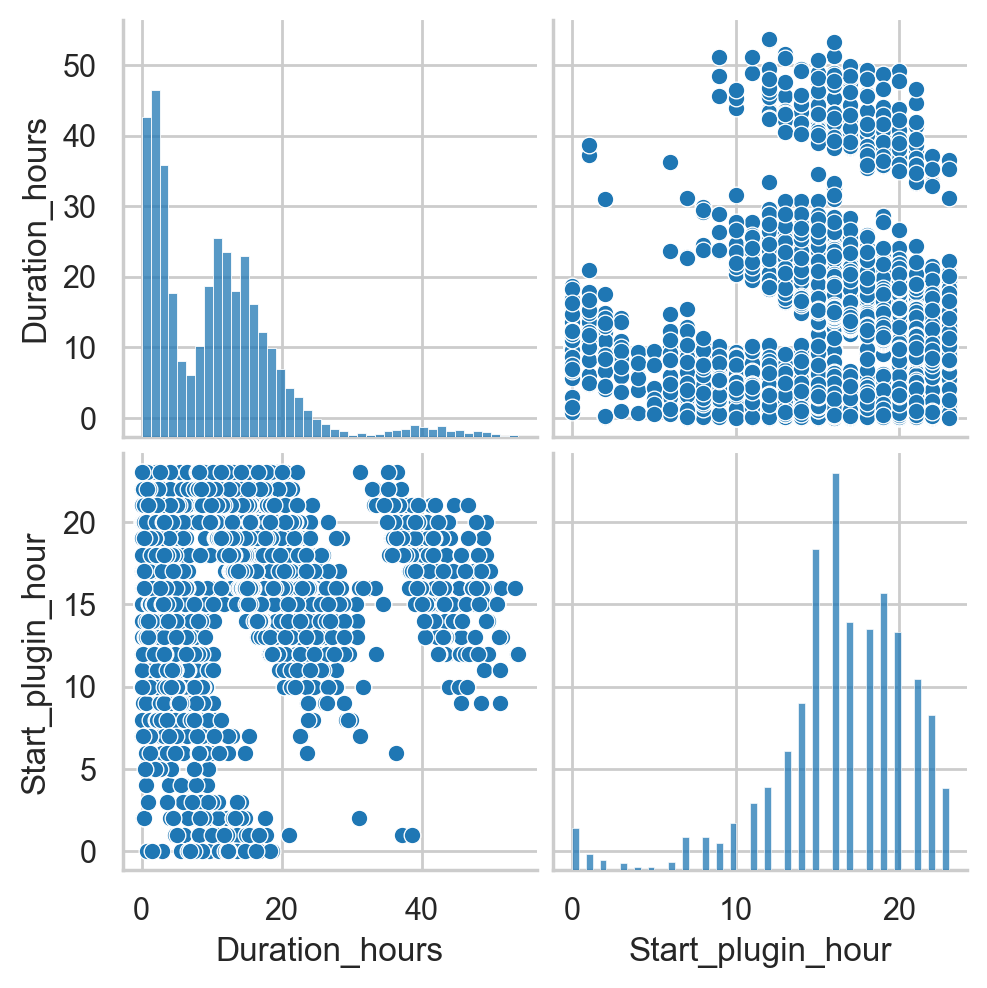

In [15]:
sns.pairplot(data=duration_df, diag_kind="hist");

## Estimating the densities with a Gaussian Mixture Model

In [16]:
duration_gm_df = duration_df.copy()

gm = GaussianMixture(n_components=3, random_state=0, covariance_type="full")
duration_gm_df["cluster"] = gm.fit_predict(duration_df)

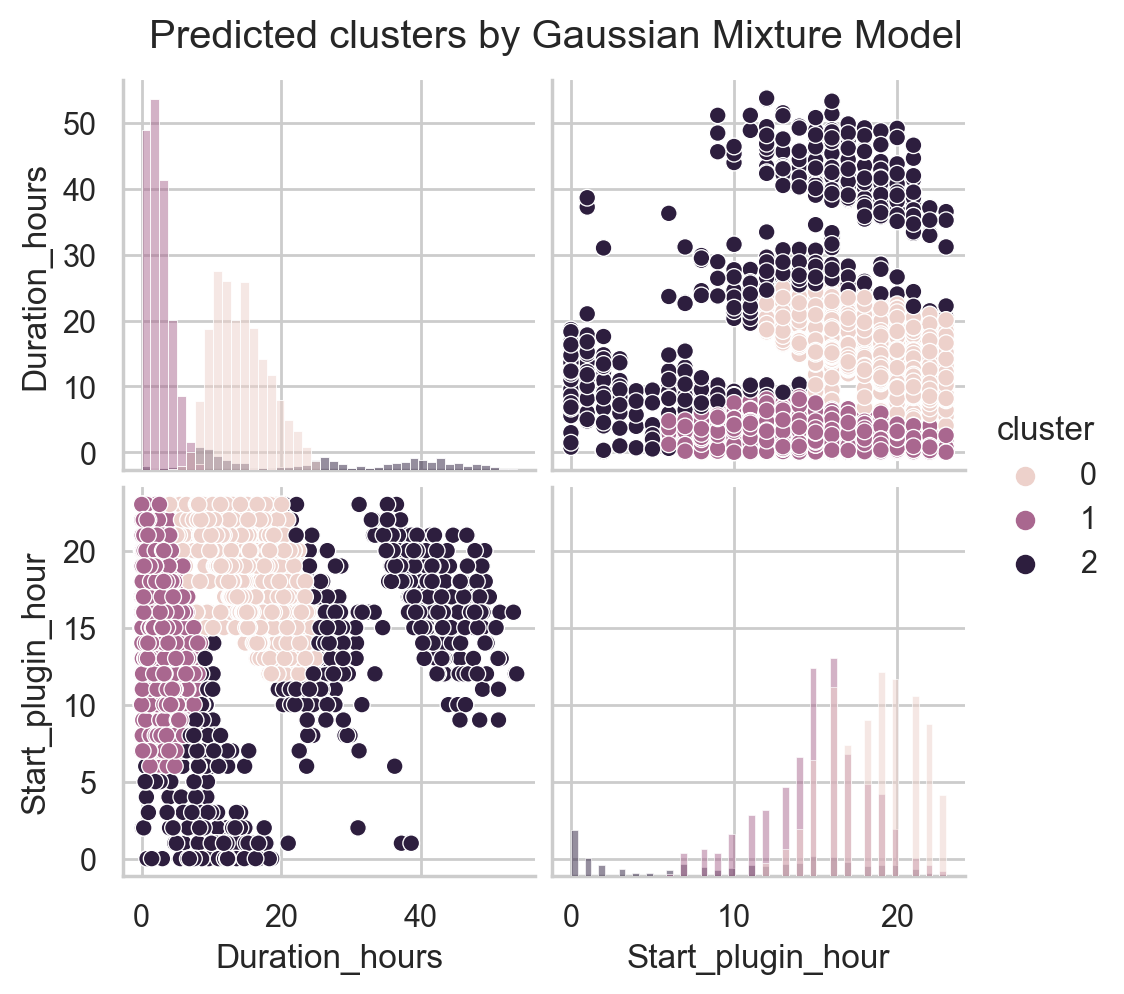

In [17]:
grid = sns.pairplot(data=duration_gm_df, hue="cluster", diag_kind="hist")
grid.figure.suptitle("Predicted clusters by Gaussian Mixture Model")
grid.tight_layout();

## Generating data from the fitted mixture distributions

In [18]:
samples, clusters = gm.sample(len(duration_df))
duration_generated_df = pd.DataFrame(samples, columns=duration_df.columns)
duration_generated_df["cluster"] = clusters
duration_generated_df

,Duration_hours,Start_plugin_hour,cluster
0,6.153605,21.156924,0
1,10.393382,20.438935,0
2,14.932650,19.026710,0
3,14.866092,21.147673,0
4,11.354415,20.447537,0
...,...,...,...
6742,7.233418,3.999742,2
6743,16.095710,12.731900,2
6744,34.715740,15.378847,2
6745,11.633872,7.261320,2


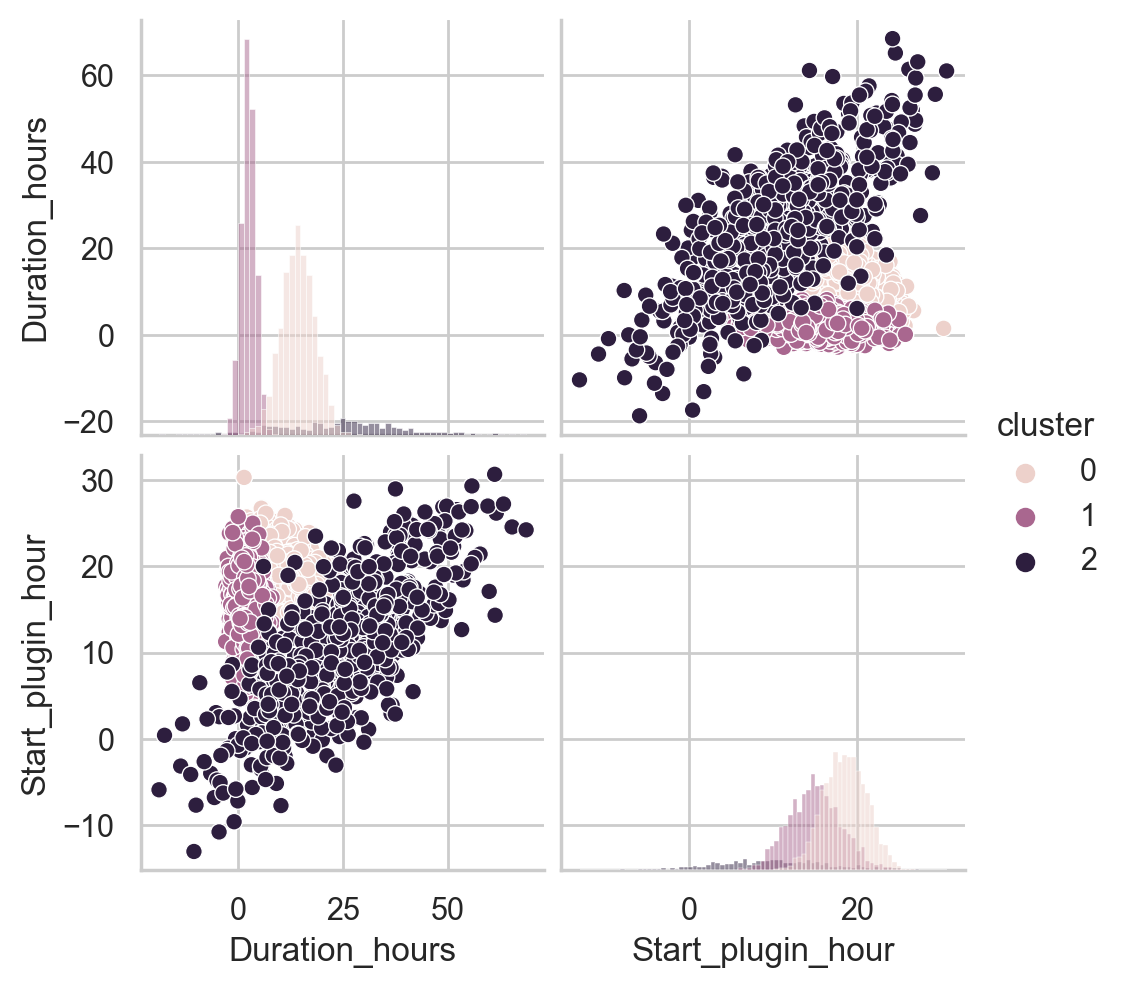

In [19]:
sns.pairplot(data=duration_generated_df, hue="cluster", diag_kind="hist");

## Compare generated duration with sample duration

In [20]:
duration_gen_vs_sample_df = pd.concat([duration_generated_df["Duration_hours"], duration_df["Duration_hours"]], axis=1)
duration_gen_vs_sample_df.columns = ["Duration hours (generated)", "Duration hours (true sample)"]

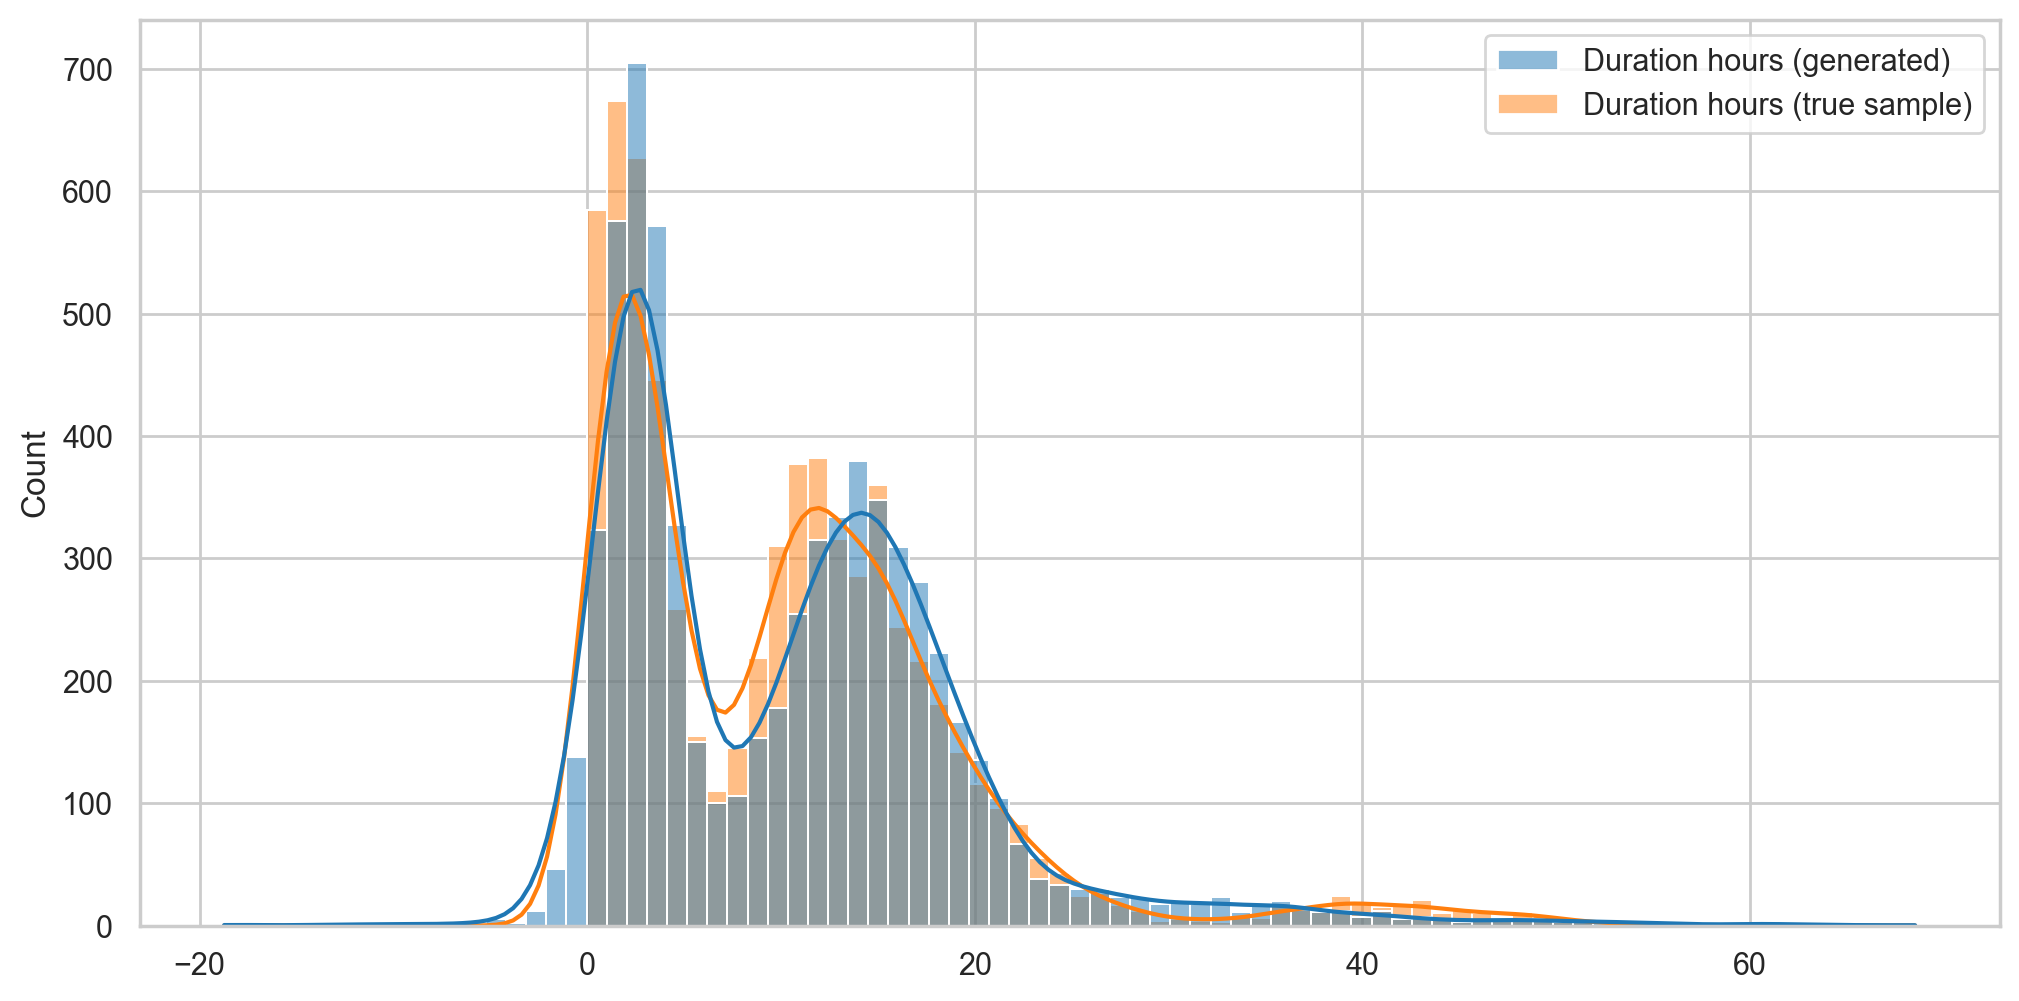

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(duration_gen_vs_sample_df, kde=True, ax=ax);